<a href="https://colab.research.google.com/github/Atharvasayyyy/Codsoft_L1_T1_Portfolio-/blob/main/Model_of_image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

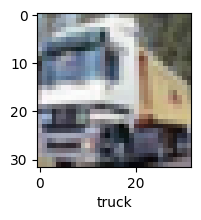

In [6]:
plot_sample(X_train, y_train, 1)

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3507 - loss: 2.6879
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5560 - loss: 1.2545
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6172 - loss: 1.0905
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6579 - loss: 0.9784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6887 - loss: 0.8948
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7083 - loss: 0.8417
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7312 - loss: 0.7771
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7497 - loss: 0.7288
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7685 - loss: 0.6746
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7777 - loss: 0.6383


In [10]:
cnn.evaluate(X_test,y_test)
y_test[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6639 - loss: 1.1074


array([3, 8, 8, 0, 6], dtype=uint8)

In [17]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


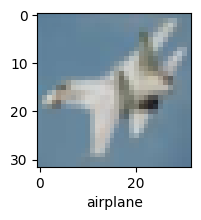

In [24]:
plot_sample(X_test, y_test,10)


In [25]:
classes[y_classes[10]]

'dog'